In [1]:
import numpy as np
import pandas as pd
import re
import json
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab

In [2]:
df = pd.read_json('../data/apartments.json')

In [31]:
df.head()

,address,price,bed,bath,area,company,neighborhood,laundry,pets,parking,utilities,property_type,year_built,description,images
0,2709 N Spurway Dr,3300.0,3,2.5,2438.0,None,NaN,0,0,0,[],apartment,NaN,BRAND NEW! This North Oaks luxury townhome on ...,[]
1,1777 Plymouth Rd,1625.0,1,1.0,730.0,None,NaN,0,0,0,[],apartment,NaN,Immediate occupancy! Unique opportunity to liv...,[]
10,City Place Ann Arbor,975.0,6,6.0,2665.0,CVC,NaN,1,0,0,[],apartment,2012.0,City Place Ann Arbor offers 6 bedroom townhome...,[]
100,"5 br, 2 bath House - 504 Lawrence St # 2",4000.0,5,2.0,NaN,None,NaN,1,1,0,[],apartment,NaN,(734) 260-7215 - Available. Fall to Fall lease...,[]
1000,The George,2619.0,2,2.0,1225.0,THC,NaN,1,0,0,[],apartment,2018.0,Move now and receive January rent FREE on sele...,[]


In [4]:
df.shape

(1789, 15)

In [121]:
df.columns

Index(['address', 'price', 'bed', 'bath', 'area', 'company', 'neighborhood',
       'laundry', 'pets', 'parking', 'utilities', 'property_type',
       'year_built', 'description', 'images'],
      dtype='object')

In [146]:
x = "price"
y = "pets"
plt.scatter(df[x],df[y])
plt.xlabel(x)
plt.ylabel(y)

Text(0, 0.5, 'pets')

<IPython.core.display.Javascript object>


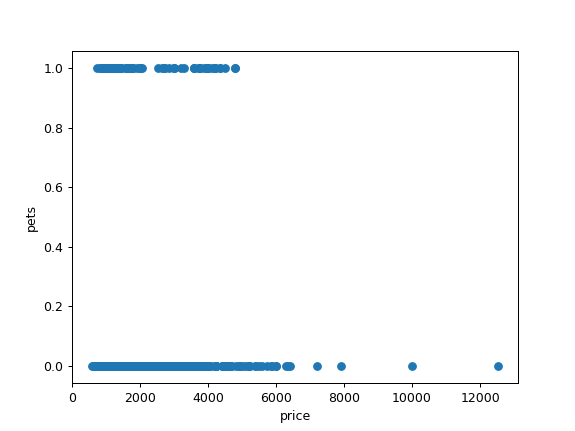

In [147]:
plt.show()

In [131]:
plt.close()

In [38]:
df["company"].unique()

array(['None', 'CVC', 'THC', 'FREM', 'WP', 'YPI', 'M&C', 'AL', 'HT', 'LG',
       'PM', 'WWC', 'SP', 'G', 'TCG', 'SCPI', 'BREIG', 'VG', 'JB', 'SM',
       'OMC', 'RCG', 'RPL', 'MBS', 'FRE', 'LM', 'TSO', 'H&TI', 'AP',
       'SFDC', 'CL&S', 'MC', 'S', 'TTG'], dtype=object)

In [46]:
group = df.groupby("company").mean()

In [44]:
def make(string):
    if string != None:
        lst = string.split(" ")
        new = ''
        for i in lst:
            new += i[0]
        return(new)
    return("None")
#df["company"] = df["company"].apply(make)
gorup = group.sort_values(by=["price"])

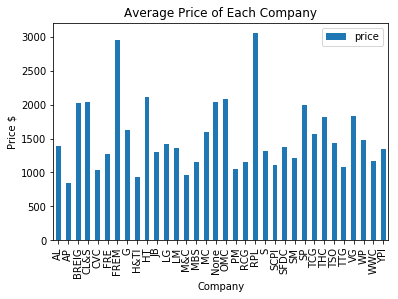

In [45]:
group.plot.bar(y=["price"])
plt.title("Average Price of Each Company")
plt.ylabel("Price $")
plt.xlabel("Company")
plt.savefig("Average_price_of_companies", dpi=300)

In [16]:
plt.show()

In [11]:
craig = pd.read_json('../data/craigslist.json')

In [37]:
craig.describe()
craig['company'].unique()

array([None, ' Keller Williams Realty Ann Arbor',
       ' Great Arbor Properties, Inc'], dtype=object)

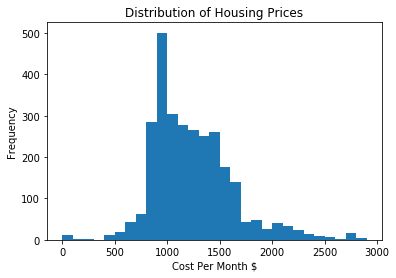

In [15]:
n, bins, patches = plt.hist(craig["price"], bins=range(0,3000,100))
plt.title("Distribution of Housing Prices")
plt.ylabel("Frequency")
plt.xlabel("Cost Per Month $")
plt.savefig("Distribution_of_Housing_Prices", dpi=300)

In [8]:
craig["price"].describe()

count     2990.000000
mean      1344.389298
std        728.873948
min          1.000000
25%        979.000000
50%       1199.000000
75%       1499.000000
max      15900.000000
Name: price, dtype: float64

In [26]:
plt.close()

In [71]:
bins[list(n).index(n.max())]

999

In [63]:
patches

<a list of 299 Patch objects>

[Text(0.5, 0, 'price'),
 Text(1.5, 0, 'bed'),
 Text(2.5, 0, 'bath'),
 Text(3.5, 0, 'area'),
 Text(4.5, 0, 'neighborhood'),
 Text(5.5, 0, 'laundry'),
 Text(6.5, 0, 'pets'),
 Text(7.5, 0, 'parking'),
 Text(8.5, 0, 'year_built')]

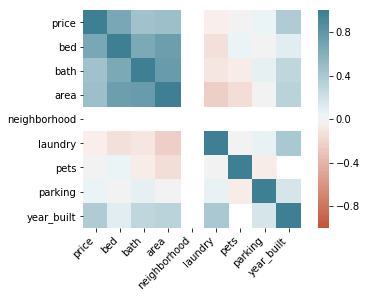

In [74]:
import seaborn as sns

corr = df.corr()
ax = sns.heatmap(
    corr,

    vmin=-1, vmax=1, center=0,

    cmap=sns.diverging_palette(20, 220, n=200),

    square=True)

ax.set_xticklabels(

    ax.get_xticklabels(),

    rotation=45,

    horizontalalignment='right'

)

In [ ]:
plt.savefig("FILENAME", dpi=300)